In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sopt.examples.utils import NearFieldPtychographySimulation
from sopt.examples.tensorflow.near_field_ptychography.tfPtycho import AdamPhaseRetriever
import sopt.benchmarks.ops.tensorflow.flops_registry_custom
from sopt.benchmarks.ops.tensorflow.graph_utils_custom import get_flops_for_sub_graph, get_flops_for_node_list

In [2]:
%load_ext autoreload
%autoreload 2

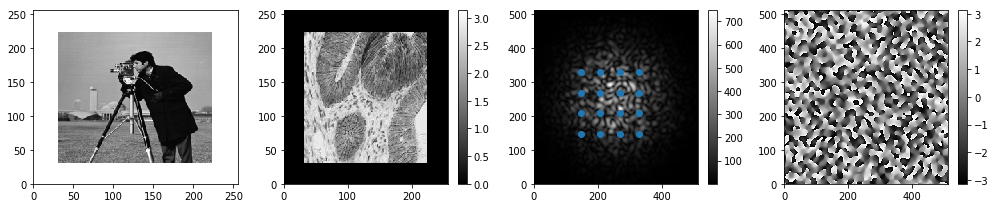

In [19]:
ptsim = NearFieldPtychographySimulation(positions_step_npix=60)

obj_center_positions = ptsim._positions + ptsim._obj_params.padded_npix // 2

fig, axs = plt.subplots(1, 4, figsize=[14,3])
cax0 = axs[0].pcolormesh(np.abs(ptsim._obj_padded), cmap='gray')
cax1 = axs[1].pcolormesh(np.angle(ptsim._obj_padded), cmap='gray')
cax2 = axs[2].pcolormesh(np.abs(ptsim._probe_true), cmap='gray')
axs[2].scatter(x=obj_center_positions.T[1], y=obj_center_positions.T[0])
cax3 = axs[3].pcolormesh(np.angle(ptsim._probe_true), cmap='gray')
plt.colorbar(cax1, ax=axs[1])
plt.colorbar(cax2, ax=axs[2])
plt.colorbar(cax3, ax=axs[3])
plt.tight_layout()
plt.show()

## Adam - reconstructing the object only
Gridsearch to find the best hyperparameters

In [22]:
def runAdam(learning_rate_obj, learning_rate_probe):
    pr = AdamPhaseRetriever(ptsim=ptsim, probe_recons=True, validation_ndiffs=0)
    pr.setOptimizingParams(learning_rate_obj=learning_rate_obj, learning_rate_probe=learning_rate_probe)
    pr.initSession()
    pr.run(debug_output_epoch_frequency=200, improvement_threshold=1e-4, patience=1000)
    return pr.data.copy()

In [23]:
grid_probe = np.logspace(3, 1, 3)
grid_obj = np.logspace(-2, 0, 3)
grid_data = {}
for lp in grid_probe:
    for lo in grid_obj:
        print(lp, lo)
        run_data = runAdam(lo, lp)
        grid_data[(lp, lo)] = run_data.copy()
        print('Final', run_data.tail(n=1))

1000.0 0.01


200 4.803107e+08 0.9046274     1000        0        0
400 3.88615e+08 0.8904073     1000        0        0
600 3.408509e+08 0.8822987     1000        0        0
800 3.111546e+08 0.8771715     1000        0        0
1000 2.907237e+08 0.8740509     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  290723680.0  1000.0   0.874051          NaN              0.0    1000.0
1000.0 0.1


200 2.882879e+08 0.9093071     1000        0        0
400 2.437778e+08 0.917082     1000        0        0
600 2.269014e+08 0.9200426     1000        0        0
800 2.172531e+08 0.9209201     1000        0        0
1000 2.127393e+08 0.9200441     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  212739328.0  1000.0   0.920044          NaN              0.0    1000.0
1000.0 1.0


200 2.516613e+08 0.8465529     1000        0        0
400 2.092064e+08 0.8402834     1000        0        0
600 1.923647e+08 0.8292675     1000        0        0
800 1.822138e+08 0.8208413     1000        0        0
1000 1.755918e+08 0.815493     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  175591840.0  1000.0   0.815493          NaN              0.0    1000.0
100.0 0.01


200 1.782589e+08 0.7052036     1000        0        0
400 1.457137e+08 0.679803     1000        0        0
600 1.334139e+08 0.6667153     1000        0        0
800 1.263197e+08 0.6548934     1000        0        0
1000 4.517862e+08 0.6397722     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  451786176.0  1000.0   0.639772          NaN              0.0    1000.0
100.0 0.1


200 1.192413e+08 0.6350954     1000        0        0
400 1.017809e+08 0.6175343     1000        0        0
600 9.423654e+07 0.6029844     1000        0        0
800 8.951148e+07 0.5923161     1000        0        0
1000 2.224186e+08 0.4760541     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  222418608.0  1000.0   0.476054          NaN              0.0    1000.0
100.0 1.0


200 1.484175e+08 0.885671     1000        0        0
400 2.032792e+08 0.8766074     1000        0        0
600 2.504951e+08 0.8170598     1000        0        0
800 3.008411e+08 0.9327863     1000        0        0
1000 4.299065e+08 0.9354565     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  429906464.0  1000.0   0.935456          NaN              0.0    1000.0
10.0 0.01


200 2.008369e+08 0.6580039     1000        0        0
400 1.493917e+08 0.6215507     1000        0        0
600 1.285516e+08 0.6013493     1000        0        0
800 1.168419e+08 0.5891383     1000        0        0
1000 1.087946e+08 0.5795822     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  108794552.0  1000.0   0.579582          NaN              0.0    1000.0
10.0 0.1


200 1.707183e+08 0.615625     1000        0        0
400 1.339873e+08 0.6108702     1000        0        0
600 1.191087e+08 0.6097394     1000        0        0
800 1.103766e+08 0.6065576     1000        0        0
1000 1.039516e+08 0.5988638     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  103951632.0  1000.0   0.598864          NaN              0.0    1000.0
10.0 1.0


200 2.041527e+08 0.7411289     1000        0        0
400 1.687911e+08 0.726727     1000        0        0
600 1.432598e+08 0.7501152     1000        0        0
800 1.369992e+08 0.7580005     1000        0        0
1000 1.446788e+08 0.7149225     1000        0        0
Final              loss   epoch  obj_error  probe_error  validation_loss  patience
1000  144678832.0  1000.0   0.714922          NaN              0.0    1000.0


In [48]:
probe_sizes = np.array([d[0] for d in grid_data])
obj_sizes = np.array([d[1] for d in grid_data])
losses = np.array([d[4][-1] for d in grid_data])

In [54]:
m = np.argsort(losses)[:5]
probe_sizes[m], obj_sizes[m], losses[m]

(array([100., 100.,  10., 100.,  10.]),
 array([0.1 , 0.01, 0.1 , 1.  , 0.01]),
 array([1.6531176e+08, 2.5727704e+08, 2.6025114e+08, 2.6449061e+08,
        2.8628477e+08], dtype=float32))

In [65]:
# Full reconstruction

In [60]:
pr_adam = AdamPhaseRetriever(ptsim=ptsim, probe_recons=True)
pr_adam.setOptimizingParams(learning_rate_obj=.01, learning_rate_probe=100)
pr_adam.initSession()

adam_obj_errors = []
adam_probe_errors = []
adam_losses = []
for i in tqdm(range(5000)):
    _ = pr_adam.session.run(pr_adam.obj_minimize_op)
    _ = pr_adam.session.run(pr_adam.probe_minimize_op)
    #pr_adam.session.run(pr_adam._obj_clip_op)
    if i % 10 != 0: continue
    recons_obj, recons_probe, lossval = pr_adam.session.run([pr_adam._tf_obj_padded_cmplx, pr_adam._tf_probe_cmplx, pr_adam.loss_tensor])
    shift, err, phase = register_translation(recons_obj, ptsim._obj_padded, upsample_factor=10)
    obj_shift, obj_err, obj_phase = register_translation(recons_obj * np.exp(-1j * phase), ptsim._obj_padded, upsample_factor=10)
    
    shift, err, phase = register_translation(recons_probe, ptsim._probe_true, upsample_factor=10)
    probe_shift, probe_err, probe_phase = register_translation(recons_probe * np.exp(-1j * phase), ptsim._probe_true, upsample_factor=10)
    
    adam_obj_errors.append(obj_err)
    adam_probe_errors.append(probe_err)
    adam_losses.append(lossval)
    if i % 50 == 0: print(i, lossval, obj_err, probe_err)
    if obj_err < 0.04: break

0 33129790000.0 0.562124173595326 0.9989700799246118
50 765785900.0 0.4283373698206383 0.9974063619003847
100 443684640.0 0.388851799515002 0.9969804705273824
150 348265020.0 0.3720119862289719 0.9965194247633484
200 299402800.0 0.36416235335467245 0.9960243057170586
250 268851300.0 0.36058657953751877 0.9954937748082162
300 246982000.0 0.3576262216798753 0.9948773630853084
350 230642600.0 0.3542440504619113 0.9942784952355879
400 216033300.0 0.3500004216037076 0.9937022411091367
450 202033680.0 0.3446277918264348 0.9928824261187728
500 185856800.0 0.3359013142701417 0.991978545490288
550 167753280.0 0.3235374145851267 0.9915149559625765
600 144880580.0 0.30776346417980843 0.9906013487655769
650 125518070.0 0.29131600207508596 0.9859104276119356
700 111948750.0 0.2750812825614365 0.9795735820194017
750 94170860.0 0.25812359132649737 0.9722807003000233
800 46087440.0 0.23696826856460806 0.9906384268266896
850 32594860.0 0.21721803997018554 0.9904347150922482
900 37597164.0 0.20534767646

KeyboardInterrupt: 

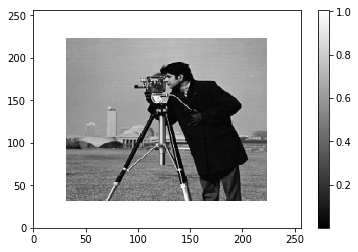

In [61]:
plt.pcolormesh(np.abs(recons_obj), cmap='gray')
plt.colorbar()
plt.show()

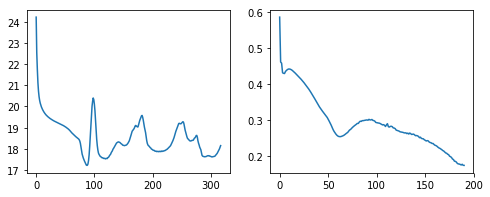

In [62]:
fig, axs = plt.subplots(1,2,figsize=[8,3])
axs[0].plot(np.log(adam_losses))
axs[1].plot(adam_errors)
plt.show()

In [63]:
with pr_adam.graph.as_default():
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()    
    flops_adam = tf.profiler.profile(run_meta=run_meta, cmd='scope', options=opts) 
    flops_adam = flops_adam.total_float_ops
    print(flops_adam)

Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
6027854209


In [66]:
total_flops = flops_adam * i
print(f'total flops {total_flops:4.3g}')

total flops 1.92e+13


# Minibatch 

In [68]:
def runAdamBatched(learning_rate_probe, learning_rate_obj, batch_size=None):
    if not batch_size:
        pr_adam = AdamPhaseRetriever(ptsim=ptsim, probe_recons=True)
    else:
        pr_adam = AdamPhaseRetriever(ptsim=ptsim, probe_recons=True, batch_size=batch_size)
    pr_adam.setOptimizingParams(learning_rate_obj=learning_rate_obj, learning_rate_probe=learning_rate_probe)
    pr_adam.initSession()
    
    adam_errors = []
    adam_losses = []
    for i in tqdm(range(2001)):
        _ = pr_adam.session.run(pr_adam.obj_minimize_op)
        _ = pr_adam.session.run(pr_adam.probe_minimize_op)
        _ = pr_adam.session.run(pr_adam._assign_op)
        #pr_adam.session.run(pr_adam._obj_clip_op)
        if i % 100 != 0: continue
        recons_obj, lossval = pr_adam.session.run([pr_adam._tf_obj_padded_cmplx, pr_adam.loss_tensor])
        shift, err, phase = register_translation(recons_obj, ptsim._obj_padded, upsample_factor=10)
        shift, err, phase = register_translation(recons_obj * np.exp(-1j * phase), ptsim._obj_padded, upsample_factor=10)
        adam_errors.append(err)
        adam_losses.append(lossval)
        if i % 500 == 0: print(i, lossval, shift, err, phase)
        if err < 0.04: break
        
    return i, adam_errors, adam_losses

In [70]:
grid_probe = np.logspace(-3, 3, 7)
grid_obj = np.logspace(-3, 3, 7)
grid_data = []
for lp in grid_probe:
    for lo in grid_obj:
        print(lp, lo)
        iterations, errors, losses = runAdamBatched(lp, lo, 5)
        grid_data.append([lp, lo, iterations, errors, losses])

0.001 0.001


0 7526870500.0 [0. 0.] 0.5641289349547374 -8.56969313592018e-10
500 7514986500.0 [0. 0.] 0.6778126114555189 -1.4963483667216738e-09
1000 7063207000.0 [0. 0.] 0.7853647577501288 2.6178318584355767e-09
1500 6534948400.0 [0. 0.] 0.8510399745755035 -1.5284251661207412e-09
2000 6968589300.0 [0. 0.] 0.8899813213943836 -7.961721257803482e-11
0.001 0.01


0 7182293000.0 [0.1 0. ] 0.56186411779087 -1.476555458559559e-09
500 7467693000.0 [ 0.2 -0.1] 0.9567872214284333 2.1616562958511558e-10
1000 7293454000.0 [ 0.2 -0.2] 0.9808883140208432 -4.2910399347436344e-10
1500 7319622700.0 [ 0.2 -0.2] 0.9877842425917946 1.1359304061605813e-10
2000 6554395600.0 [ 0.2 -0.3] 0.9908206571338433 -4.1510478705916337e-10
0.001 0.1


0 7011670000.0 [0. 0.] 0.5891476553072724 -2.6230348307587604e-09
500 6636619000.0 [-0.2  0. ] 0.9945590211760167 1.815187077144758e-10
1000 6941474300.0 [-0.4 -0.1] 0.9963048414670158 -5.917006475828894e-10
1500 6812517400.0 [-0.5 -0.1] 0.9967889647137941 -4.810979454763514e-10
2000 6919246300.0 [-0.5  0. ] 0.9970143312294837 4.2599116046963153e-10
0.001 1.0


0 6879752700.0 [ 0.  -0.1] 0.8521844470276768 3.3521451335414103e-10
500 7595225000.0 [ 0.3 -0.1] 0.9966013939788955 -1.1393329055406101e-09
1000 7001650000.0 [ 0.3 -0.1] 0.9970959448457154 2.7621237828451987e-10
1500 7788913000.0 [-0.7  0.4] 0.9973812731312036 5.265219230311593e-10
2000 6871494700.0 [-1.1  0.6] 0.9976764180652296 -0.004363753463517548
0.001 10.0


0 18949892000.0 [-1.   0.8] 0.9930122300056176 -1.6116077242080338e-09
500 9699456000.0 [-0.3 -0.1] 0.9967389436688288 9.501354932831106e-10
1000 6328121300.0 [-0.1 -0.2] 0.9972169276062928 7.798934465762827e-10
1500 7395971000.0 [ 0.1 -0.1] 0.9971879045362962 1.2675662637064998e-10
2000 7074812000.0 [-2.3 -0.3] 0.9981149656660914 -1.5603340458863483e-09
0.001 100.0


0 829509800000.0 [ -75.7 -121.6] 0.9857888284065235 0.0027420797471697763
500 10377599000.0 [10.2  0. ] 0.9996668423570827 -0.0036026733891255467
1000 77696524000.0 [11.8 -0.8] 0.9997904594505561 9.87686956323947e-10
1500 33531615000.0 [ 1.  -1.8] 0.9998901042064825 4.252059736900662e-09
2000 105620650000.0 [ 7.7 -0.2] 0.9997668226530818 -4.383566332562068e-09
0.001 1000.0


0 46276320000000.0 [-95.6 117.3] 0.9931645366250273 0.01466463460937121
500 10238264000000.0 [119. -82.] 0.999931180532368 -0.03179678429052268
1000 1444929700000.0 [ 22.1 -46.8] 0.9999343881986708 3.4308995588542208e-09
1500 2810007000000.0 [16.9 79.4] 0.9999449400102576 -0.005744301822394345
2000 11933649000000.0 [ 80.3 102.1] 0.9999661694649307 0.10090790579759491
0.01 0.001


0 7122747000.0 [0. 0.] 0.5625396589735874 7.245112547104338e-10
500 6653863400.0 [0. 0.] 0.6960981740367146 -0.00027370771617348617
1000 5501903000.0 [-0.1  0.1] 0.8034460187003173 -2.7365961645502495e-09
1500 5745882000.0 [0.  0.1] 0.846082277603607 -0.0004365591327563262
2000 5116914700.0 [0.  0.1] 0.8610167665933439 -4.024215151205858e-09
0.01 0.01


0 6980567000.0 [0.1 0. ] 0.5640364738490009 -0.00011367832031616937
500 6095816000.0 [ 0.1 -0.1] 0.9603970608741971 -0.0006550187706690793
1000 5892977700.0 [ 0.1 -0.1] 0.9747850772020434 -3.9413589019385907e-10
1500 4383399400.0 [0.2 0. ] 0.9779930684293988 -9.016054156308441e-10
2000 5058038000.0 [0.2 0. ] 0.9794608067314461 3.9383483313475984e-10
0.01 0.1


0 7084840000.0 [0.  0.1] 0.5873653513885037 -2.412797184155934e-10
500 5883669000.0 [0.2 0.1] 0.9954682481792402 -6.84366360057021e-10
1000 5142068700.0 [0.3 0.2] 0.9966108844261194 1.8533203153303497e-09
1500 4775758300.0 [0.3 0.2] 0.996897172699763 1.0367231949048043e-09
2000 4160717800.0 [0.3 0.2] 0.9970381845549975 1.6765168232088412e-09
0.01 1.0


0 7090013000.0 [0.1 0. ] 0.8527419644930749 -0.00028321851454569307
500 6463268000.0 [0.5 0.4] 0.9980542259099862 -4.088940830631509e-10
1000 6063850500.0 [ 2.2 -1. ] 0.9983193206555573 0.0004770719744142203
1500 4435551700.0 [ 2.2 -1.2] 0.9983388863005963 -1.8419091000310683e-09
2000 4133610500.0 [ 2.3 -1.2] 0.9983230728699596 5.778068257601371e-10
0.01 10.0


0 10067108000.0 [ -68.  -119.4] 0.9879432652613467 0.0016189635114029469
500 6162603000.0 [ 0.3 -2. ] 0.9985766752084981 -0.0012939466547127118
1000 9903657000.0 [ 4.  -1.2] 0.9991932310917866 -1.6165764844488717e-09
1500 5536238600.0 [ 0.6 -1.1] 0.9987370958802215 -7.830944023014228e-10
2000 5373730000.0 [ 0.7 -1.2] 0.9986872417554084 -2.6895368251150877e-10
0.01 100.0


0 336965340000.0 [-63.6 -26.5] 0.9901987928547351 -0.0006001363631619517
500 131291920000.0 [-10.2   1.6] 0.9998017552760595 -0.026464539832219264
1000 30925950000.0 [ 0.7 -0.2] 0.9995530396117217 -1.8992781660523037e-09
1500 299564600000.0 [ -62.3 -100.2] 0.9999343609524692 -0.01306926525811298
2000 97726685000.0 [ 8.4 -2.3] 0.9996686511352766 1.7186354724534994e-09
0.01 1000.0


0 141291900000000.0 [-68.3 119.5] 0.9896565905255775 0.0016547230924371505
500 8835975000000.0 [-33.1   3.6] 0.9999468274227102 0.04527720996965301
1000 1977831100000.0 [-33.5 -30.8] 0.9999570863489556 8.848555086868034e-09
1500 3685358200000.0 [-90.1  97.8] 0.9999450197849287 -0.03795837866810314
2000 1085042600000.0 [-124.6  -89.8] 0.9999409613810855 -0.0007394888461216924
0.1 0.001


0 7123677000.0 [0. 0.] 0.5629775471386081 -1.8604415847956764e-09
500 3405127200.0 [0.1 0. ] 0.6657380844076443 -7.144227988423071e-10
1000 1653270500.0 [0.2 0. ] 0.6368019696466002 1.1411209723007337e-09
1500 1132765300.0 [0.2 0. ] 0.586143204165235 4.110208213346067e-09
2000 611752640.0 [0.2 0.1] 0.5416283025086093 -6.53617047932165e-09
0.1 0.01


0 7774112000.0 [0. 0.] 0.5641093922441562 1.2569931765393744e-09
500 3153912300.0 [0.3 0.5] 0.8810076807383821 -0.0008036679600508257
1000 1787112100.0 [0.4 0.2] 0.8799342606200358 6.088450647669901e-09
1500 1367812400.0 [0.4 0.1] 0.8698745486048426 -1.375784051614689e-09
2000 741682050.0 [0.4 0. ] 0.8569912816020656 4.85020782371021e-09
0.1 0.1


0 7462697000.0 [0. 0.] 0.588406437857801 -1.2138116958782576e-10
500 2918071800.0 [0.3 0.4] 0.9797525201880205 -2.073352099027251e-09
1000 1682119400.0 [0.3 0.4] 0.979773761626874 1.7920601476827124e-09
1500 1346424300.0 [0.4 0.5] 0.9781502888492141 -0.0009052740540241802
2000 890831300.0 [0.4 0.5] 0.9759080785264729 -0.0009462427826248144
0.1 1.0


0 7401174500.0 [0.1 0.1] 0.8595920210224928 1.1665363383246801e-09
500 2942960000.0 [0.3 0.4] 0.9966137069706872 2.1699031293237255e-09
1000 1683044700.0 [0.3 0.5] 0.9964171728166655 -1.326159357552395e-09
1500 919815740.0 [0.3 0.6] 0.9961015576265657 2.782895177524859e-10
2000 798474400.0 [0.3 0.6] 0.9957496060440254 -1.3385038512866729e-09
0.1 10.0


0 15154017000.0 [ 0.5 -0.6] 0.9866198921041294 -0.0018827196028690888
500 3826974700.0 [ 0.1 -0.5] 0.998345590523868 5.876125406856461e-10
1000 2331548700.0 [-4.5 -4.2] 0.9986308270590072 -0.001071528107156196
1500 2238792700.0 [-4.7  0.8] 0.9987532154071906 -9.444720211819917e-10
2000 1924925200.0 [-4.6 -4. ] 0.9989285761944553 -5.926759571152348e-10
0.1 100.0


0 302311500000.0 [-63.9 -22.7] 0.9910446453875624 0.005499649764316603
500 9131126000.0 [0.7 0.1] 0.9998296722561258 0.0032864834562106853
1000 20191158000.0 [-2.3 -3.1] 0.999680911435294 -1.5817329592840487e-09
1500 19559786000.0 [-4.2 -5.8] 0.9997907227029786 0.0039047522830387782
2000 4199797000.0 [-2.  -3.3] 0.9998050492765244 0.013678280263060083
0.1 1000.0


0 109429584000000.0 [-63.8 -23.8] 0.9920104592056694 0.00733237123088952
500 6502889000000.0 [ 80.  124.5] 0.9999382070448647 -0.013739873032504067
1000 895072200000.0 [90.  38.5] 0.9999515626649285 -0.07943771738259475
1500 5301631700000.0 [ 50.7 -92.9] 0.9999316606400707 0.018750333738316815
2000 1104892500000.0 [-85.3  63.8] 0.9999330139894317 -0.0724612298340226
1.0 0.001


0 7487175700.0 [0. 0.] 0.5617847015087295 -3.443476780580363e-10
500 216933570.0 [0. 0.] 0.4538668016851747 1.0317215691517776e-09
1000 138347070.0 [0. 0.] 0.41080392560681794 3.445196942041719e-09
1500 109105540.0 [0. 0.] 0.40771894004270165 -3.990737731359624e-09
2000 95159910.0 [0.1 0. ] 0.414491987474156 -0.00015477629319526304
1.0 0.01


0 6689369000.0 [0. 0.] 0.5641984991485189 -5.795958443903616e-10
500 152838560.0 [0.1 0.1] 0.49280251161435007 -0.0002900373911041604
1000 100156850.0 [0.  0.1] 0.5724352785759876 2.3523179929787236e-09
1500 78697010.0 [0.1 0.1] 0.5961671799137337 -0.00019744994667968537
2000 72239430.0 [0.1 0.1] 0.6040671597438529 -0.00019570594762576257
1.0 0.1


0 7150561300.0 [0. 0.] 0.5808870881215447 9.65953650457039e-10
500 241411740.0 [ 0.2 -0.2] 0.7441393656334205 -0.000471696340884599
1000 124117870.0 [0.1 0. ] 0.7409219579227806 -0.0004066241942004059
1500 105611070.0 [0.1 0.1] 0.7384109242398603 -0.00041239770648810343
2000 95219496.0 [0.1 0.1] 0.7370534758621432 -0.00036691349567152034
1.0 1.0


0 7670841000.0 [0. 0.] 0.8557185722672931 -4.4652208536440514e-09
500 523478700.0 [ 0.4 -0.1] 0.9700339555167015 -1.8520817952977442e-09
1000 419289570.0 [ 0.4 -0.2] 0.9691900866329826 -0.0003892122615545496
1500 267735660.0 [ 0.3 -0.3] 0.9733742084996517 -0.0007260073827510507
2000 265031570.0 [ 0.3 -0.3] 0.9748443198832493 -3.4807854737039217e-10
1.0 10.0


0 15943731000.0 [ 0.  -0.1] 0.9837781392194976 -0.00028685861685804465
500 1497867000.0 [0.3 0. ] 0.9977613214672651 9.233695315581261e-10
1000 1509753500.0 [ 3.1 -1. ] 0.9975823967554626 -1.7757589252153234e-10
1500 1839025700.0 [0.2 0.9] 0.997749582133756 1.2408148012535176e-09
2000 1791149300.0 [2.2 1.2] 0.9974303300169933 0.004910287350587807
1.0 100.0


0 572142650000.0 [-66.3 125. ] 0.9856056022711536 0.0024192122268556285
500 2834674200.0 [11.8  2.3] 0.9995988514324162 -5.966281851954428e-10
1000 2047777000.0 [-0.7 -0.4] 0.9996395279480113 6.9743896789225226e-09
1500 2113986200.0 [9.6 0.8] 0.9993758456025126 0.0022670816947826327
2000 3436816400.0 [10.   0.7] 0.999492854923394 0.0020933425409259245
1.0 1000.0


0 56343210000000.0 [-64.2 128.2] 0.9853556959088149 0.005424476523423858
500 1752232000000.0 [ -6.1 -63.7] 0.9999423568212926 0.02578226867949578
1000 14394989000.0 [  4.5 128.5] 0.9999264371398296 0.0335043620983666
1500 19203994000.0 [-121.8   27.1] 0.9999470476942137 -0.00660217024170662
2000 38938812000.0 [ 3.4 57.4] 0.9998923364065396 -1.5109791954644186e-08
10.0 0.001


0 6260154000.0 [0. 0.] 0.5634990090104485 1.812873860110189e-09
500 139973860.0 [0. 0.] 0.4398772445604401 -2.467494660442979e-09
1000 97542520.0 [0. 0.] 0.38955880825304173 3.758548534251658e-10
1500 77566980.0 [0.1 0. ] 0.3703724388953185 4.4593998705697845e-09
2000 62367890.0 [0.1 0. ] 0.3639249111212492 1.2933036944302368e-09
10.0 0.01


0 6031229000.0 [0. 0.] 0.5640527588406308 3.9728042743487394e-10
500 52686320.0 [0.1 0. ] 0.39106172532998834 -0.0001526137339532093
1000 50611976.0 [ 0.1 -0.1] 0.3916636286502992 -1.0549567569439436e-08
1500 35526780.0 [ 0.2 -0.2] 0.38097388131445564 -2.5296923536616276e-09
2000 28139906.0 [ 0.2 -0.2] 0.35892311265260896 3.790255141432314e-09
10.0 0.1


0 6185843700.0 [0. 0.] 0.5876616200973775 1.85063427175706e-09
500 52681376.0 [0.2 0.1] 0.5550740500844175 -0.00018957049257795796
1000 43277710.0 [ 0.2 -0.1] 0.4901724870460207 -1.5824109788777876e-09
1500 35957104.0 [ 0.2 -0.3] 0.4111219978530984 -2.1200728452453023e-09
2000 38482748.0 [ 0.1 -0.4] 0.3394237218901613 8.391879701983402e-09
10.0 1.0


0 6028407000.0 [0.1 0. ] 0.8501751556162797 -1.1280225443066947e-09
500 350260300.0 [0.3 0. ] 0.8966444227092141 -0.0008451224663139065
1000 264591790.0 [0.3 0. ] 0.9063495731191439 -0.001103251478998359
1500 379760200.0 [0.4 0.4] 0.9240135049463781 -0.0023860670267284163
2000 272343400.0 [ 0.2 -0.2] 0.9129771579180938 -4.651892448836845e-09
10.0 10.0


0 13496179000.0 [-105.8 -111.7] 0.9909292499643543 0.0023377265824166106
500 2323896600.0 [ 0.1 -1. ] 0.9950928057678904 0.0040119814356162
1000 3404998000.0 [ 0.  -2.1] 0.9953969816398937 1.9398915428173806e-10
1500 2385886700.0 [ 0.3 -1.3] 0.9942037023201495 0.0016297366395763057
2000 2704509700.0 [ 0.7 -1. ] 0.9935192432649154 0.0010512556106561652
10.0 100.0


0 582875940000.0 [ -70.1 -122.8] 0.9910316148427857 0.009120981846268021
500 123343360000.0 [7.2 7.5] 0.9997529243084224 -3.0661636001391657e-09
1000 88269480000.0 [0.2 3.5] 0.9997110645403734 -0.009380709339756306
1500 94501730000.0 [-0.6  6. ] 0.9997133371442096 7.877919877566321e-09
2000 154178960000.0 [0.9 5.1] 0.9995554614955116 -3.80660834811754e-10
10.0 1000.0


0 68681360000000.0 [-70.  124.9] 0.9871942030039135 0.006648993469785382
500 527836000000.0 [-87.  -79.3] 0.9999445005356669 -0.08890293294383884
1000 1532332200000.0 [-18.6  42. ] 0.9999001734514962 -0.008614961112773057
1500 4334861400000.0 [ 75.3 -84.9] 0.9999426622480501 -0.004139553404136515
2000 6846828500000.0 [98.5 72.3] 0.9999460227020283 -0.14451086887614156
100.0 0.001


0 6789868000.0 [0. 0.] 0.5599674073644709 -8.100914651753575e-10
500 203014130.0 [0. 0.] 0.4619759633458254 6.675821640720869e-10
1000 160490180.0 [0. 0.] 0.42017258698276694 5.50191911956374e-10
1500 181804020.0 [0. 0.] 0.4076720715549228 -2.3298593836606516e-09
2000 151314370.0 [0. 0.] 0.40724534185172157 -2.5788700051817102e-09
100.0 0.01


0 6704773600.0 [0. 0.] 0.5649145162725944 -4.1084186964532755e-10
500 98189340.0 [ 0.1 -0.1] 0.3856879159913238 -3.4222740587860768e-09
1000 66930680.0 [ 0.4 -0.1] 0.3545953996151782 -7.884506161126036e-09
1500 17794796.0 [0.3 0. ] 0.24269145193896616 1.899716648893465e-09
2000 32857530.0 [0.2 0. ] 0.20101332139017247 -3.3408574188243163e-09
100.0 0.1


0 6713160700.0 [0. 0.] 0.5929788117422391 2.1751253209697873e-09
500 59359410.0 [ 0.4 -0.2] 0.4363954819854778 -0.0003619126184968166
1000 32150692.0 [0.5 0.1] 0.3041947757755739 -0.0002818245801619014
1500 46867684.0 [0.4 0.1] 0.21801909493396648 2.187239011500376e-09
2000 51228390.0 [0.3 0. ] 0.1717025029175168 -1.0690788734114284e-09
100.0 1.0


0 9442649000.0 [ 0.  -0.1] 0.8495653167379958 -4.882485679930887e-09
500 621252740.0 [0. 0.] 0.7373493930778409 -1.2792350552491143e-09
1000 691036200.0 [0.1 0.1] 0.7243390560820967 -0.00016800673376024864
1500 1012796300.0 [0.  0.1] 0.7634710765359255 -2.314347141227725e-11
2000 756048800.0 [-0.1  0. ] 0.7281362636867754 -2.4103171502150036e-09
100.0 10.0


0 335612300000.0 [64.7  0.2] 0.9912992647758638 -0.014237212193776227
500 107119570000.0 [ 0.  -0.1] 0.988098153742583 -6.543760873862393e-10
1000 98016550000.0 [ 0.1 -0.3] 0.9794684672793964 -8.469414954761403e-11
1500 106636740000.0 [-0.2  0.1] 0.9787807489504974 -2.7371555018657807e-10
2000 157382560000.0 [0.2 0.2] 0.9794347529340995 4.012834942769576e-11
100.0 100.0


0 34472928000000.0 [-66.5 -51.7] 0.9894793517837077 0.0076937718839995605
500 1451877900000.0 [-1.3  0.2] 0.9988999805441899 -2.551755651646077e-10
1000 847859900000.0 [-0.1 -0.2] 0.9975545156445362 3.177064502798526e-10
1500 6350567000000.0 [-2.8  0. ] 0.9995319615331697 2.302346346196226e-09
2000 3462671000000.0 [-2.8 -7. ] 0.9991375364120616 4.9325545125152084e-09
100.0 1000.0


0 3473674500000000.0 [-63.8 -63.7] 0.9853227536641556 0.0062801968644471285
500 74374620000000.0 [15.4 47.3] 0.9999256597120075 -0.007782962831529546
1000 335746550000000.0 [-22.6 -20.3] 0.9999271002086306 -0.03351978030430354
1500 120983240000000.0 [120.1  40.8] 0.9999369567857986 -0.005411069804078581
2000 157876660000000.0 [ 37.2 -66.8] 0.9999563233928503 -0.03615074451477985
1000.0 0.001


0 1065943200000.0 [0. 0.] 0.5599484751222434 -1.1777544717566638e-10
500 1063018500.0 [0. 0.] 0.5350900875381793 -1.509443793367704e-11
1000 1829033600.0 [0. 0.] 0.5024714079685217 -1.5555696466573116e-09
1500 7589423600.0 [0. 0.] 0.47325597140105813 6.540135304340338e-10
2000 3611420000.0 [0. 0.] 0.45615912614019977 -7.177976100812879e-11
1000.0 0.01


0 1064880300000.0 [0. 0.] 0.5658884191353079 -2.1982393105822074e-09
500 888572000.0 [0. 0.] 0.4600430643305325 -5.517385834730705e-10
1000 1572625700.0 [0. 0.] 0.47686799824606935 -6.008852180571714e-10
1500 3901298200.0 [0. 0.] 0.5082137795477464 -4.727778066250692e-10
2000 3394627000.0 [0. 0.] 0.5177441607884706 6.072013528870281e-10
1000.0 0.1


0 1080336060000.0 [0. 0.] 0.5909833778983664 1.4751746600060794e-09
500 1704807400.0 [0. 0.] 0.5483696226800601 7.900361197680943e-10
1000 4470801400.0 [0. 0.] 0.5354656392986474 -1.2830679667982173e-10
1500 3210507500.0 [0. 0.] 0.565601315824008 2.557941592697575e-11
2000 3198443500.0 [0. 0.] 0.5426188571353063 -1.586838906293626e-10
1000.0 1.0


0 1484280400000.0 [0.2 0. ] 0.8612944250933278 5.724163741703172e-10
500 227855780.0 [0. 0.] 0.5897892266625769 -2.018134035042881e-09
1000 163051950000.0 [0. 0.] 0.7790287198330207 1.7028852721788724e-12
1500 44872176000.0 [0. 0.] 0.6419244058841629 2.4804665892821565e-11
2000 5913687000.0 [0. 0.] 0.5427241842662469 -6.461659442439334e-10
1000.0 10.0


0 38849190000000.0 [ 0.3 -0.1] 0.9865636667242256 -7.3839502986329335e-09
500 86729320000.0 [0.1 0. ] 0.7446941936811947 -1.9631558767200265e-09
1000 120427064.0 [0.1 0. ] 0.708727925673571 -0.00010359536868941441
1500 250907280.0 [0.1 0. ] 0.7148975232670366 2.2185118846573703e-09
2000 635072830.0 [0.1 0. ] 0.7125718839925588 6.052735213939774e-09
1000.0 100.0


0 3648353300000000.0 [-63.7 -47.8] 0.991303502137573 0.006894496976902025
500 7929237300000.0 [0.  0.4] 0.9942794045598058 -5.43343747375433e-12
1000 4606081500.0 [-0.3  0.4] 0.9752278804739066 -3.461435568065677e-10
1500 2234349600.0 [-0.2  0.3] 0.9731625006236886 1.381597340339566e-09
2000 1401382200000.0 [0.  0.1] 0.9824512992690626 -2.3804723488529244e-10
1000.0 1000.0


0 3.6624667e+17 [-116.4  -64.4] 0.9878757367626544 0.015562966311945306
500 2143958300000000.0 [81.8  7.8] 0.9999054623265774 -0.006767792733838161


KeyboardInterrupt: 